In [14]:
import get_data
import cv2
import numpy as np
from PIL import Image, ImageStat
from tqdm import tqdm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#real_images, fake_images = get_data.get_images("data/dataset2/")

real_images, fake_images = get_data.get_images("data/dataset1/train/")

In [16]:
def print_stats(data, label):
    print(f"Stats for {label}:")
    print("Mean:", np.mean(data))
    print("Median:", np.median(data))
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("Q1:", q1)
    print("Q3:", q3)
    print("Range:", np.ptp(data))
    print("IQR:", stats.iqr(data))
    print()

In [17]:
def get_brightness(image_path):
    image = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(image)
    return stat.mean[0]

def get_contrast(image_path):
    image = cv2.imread(image_path, 0)
    return cv2.Laplacian(image, cv2.CV_64F).var()

def get_saturation(image_path):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return np.mean(hsv[:,:,1])

In [18]:
real_brightness = [get_brightness(image) for image in tqdm(real_images)]
fake_brightness = [get_brightness(image) for image in tqdm(fake_images)]

print_stats(real_brightness, "Real Images Brightness")
print_stats(fake_brightness, "Fake Images Brightness")

t_stat, p_value = stats.ttest_ind(real_brightness, fake_brightness)
print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 50000/50000 [00:16<00:00, 3034.41it/s]

Stats for Real Images Brightness:
Mean: 122.59830869140625
Median: 121.19921875
Q1: 102.0908203125
Q3: 141.240234375
Range: 241.37109375
IQR: 39.1494140625

Stats for Fake Images Brightness:
Mean: 112.26130939453125
Median: 111.9384765625
Q1: 97.731201171875
Q3: 126.4453125
Range: 161.8857421875
IQR: 28.714111328125

T statistic: 61.67149155944556
P value: 0.0


In [19]:
real_contrast = [get_contrast(image) for image in tqdm(real_images)]
fake_contrast = [get_contrast(image) for image in tqdm(fake_images)]

print_stats(real_contrast, "Real Images Contrast")
print_stats(fake_contrast, "Fake Images Contrast")

t_stat, p_value = stats.ttest_ind(real_contrast, fake_contrast)
print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 50000/50000 [00:12<00:00, 4149.27it/s]

Stats for Real Images Contrast:
Mean: 2440.887313547077
Median: 2146.454390525818
Q1: 1370.5123710632324
Q3: 3157.70800280571
Range: 16577.814346313477
IQR: 1787.1956317424774

Stats for Fake Images Contrast:
Mean: 3814.090425117626
Median: 3500.667064666748
Q1: 2216.351477622986
Q3: 5027.6276252269745
Range: 49822.07237529755
IQR: 2811.2761476039886

T statistic: -116.90744301083255
P value: 0.0


In [20]:
real_saturation = [get_saturation(image) for image in tqdm(real_images)]
fake_saturation = [get_saturation(image) for image in tqdm(fake_images)]

print_stats(real_saturation, "Real Images Saturation")
print_stats(fake_saturation, "Fake Images Saturation")

t_stat, p_value = stats.ttest_ind(real_contrast, fake_contrast)
print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 50000/50000 [00:08<00:00, 5555.69it/s]

Stats for Real Images Saturation:
Mean: 71.08791349609375
Median: 66.01953125
Q1: 43.6630859375
Q3: 93.177001953125
Range: 246.8232421875
IQR: 49.513916015625

Stats for Fake Images Saturation:
Mean: 92.2073626953125
Median: 92.560546875
Q1: 56.555908203125
Q3: 127.85498046875
Range: 238.47265625
IQR: 71.299072265625

T statistic: -116.90744301083255
P value: 0.0


In [21]:
def get_unique_pixel_values(image_path):
    image = cv2.imread(image_path)
    unique_values = np.unique(image.reshape(-1, image.shape[2]), axis=0)
    return len(unique_values)

real_unique_pixels = [get_unique_pixel_values(image) for image in tqdm(real_images)]
fake_unique_pixels = [get_unique_pixel_values(image) for image in tqdm(fake_images)]

print_stats(real_unique_pixels, "Real Images Unique Pixels")
print_stats(fake_unique_pixels, "Fake Images Unique Pixels")

t_stat, p_value = stats.ttest_ind(real_unique_pixels, fake_unique_pixels)
print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 50000/50000 [00:45<00:00, 1102.79it/s]

Stats for Real Images Unique Pixels:
Mean: 907.03404
Median: 958.0
Q1: 883.0
Q3: 992.0
Range: 976
IQR: 109.0

Stats for Fake Images Unique Pixels:
Mean: 826.07574
Median: 944.0
Q1: 772.0
Q3: 993.0
Range: 969
IQR: 221.0

T statistic: 63.69221496817798
P value: 0.0


In [22]:
def get_color_range(image_path):
    image = cv2.imread(image_path)
    blue, green, red = cv2.split(image)
    return np.ptp(red), np.ptp(green), np.ptp(blue)

real_color_range = [get_color_range(image) for image in tqdm(real_images)]
fake_color_range = [get_color_range(image) for image in tqdm(fake_images)]

# Calculate the average color range for real and fake images
real_color_range_avg = np.mean([np.mean(ranges) for ranges in real_color_range])
fake_color_range_avg = np.mean([np.mean(ranges) for ranges in fake_color_range])

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind([np.mean(ranges) for ranges in real_color_range], [np.mean(ranges) for ranges in fake_color_range])

print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 50000/50000 [00:23<00:00, 2172.94it/s]


T statistic: -54.03694828252828
P value: 0.0


C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_13844\575613453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_brightness, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_13844\575613453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

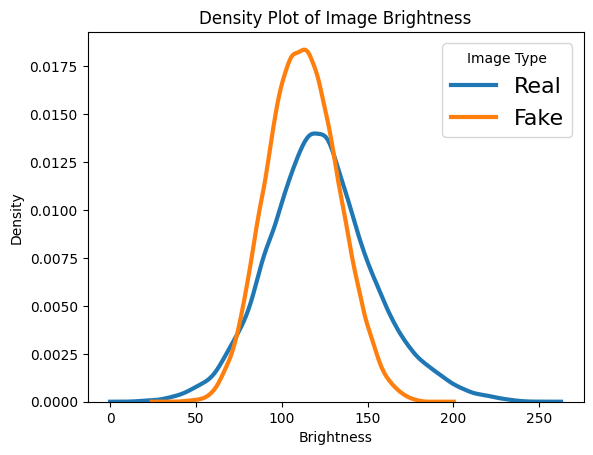

In [34]:
sns.distplot(real_brightness, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
sns.distplot(fake_brightness, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')

plt.legend(prop={'size': 16}, title = 'Image Type')
plt.title('Density Plot of Image Brightness')
plt.xlabel('Brightness')
plt.ylabel('Density')

plt.show()

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_13844\2681496380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_contrast, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_13844\2681496380.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

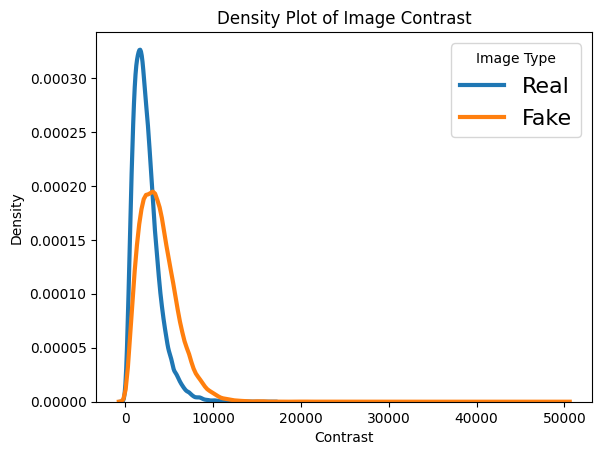

In [32]:
sns.distplot(real_contrast, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
sns.distplot(fake_contrast, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')

plt.legend(prop={'size': 16}, title = 'Image Type')
plt.title('Density Plot of Image Contrast')
plt.xlabel('Contrast')
plt.ylabel('Density')

plt.show()

TypeError: KDE.__init__() got an unexpected keyword argument 'linewidth'

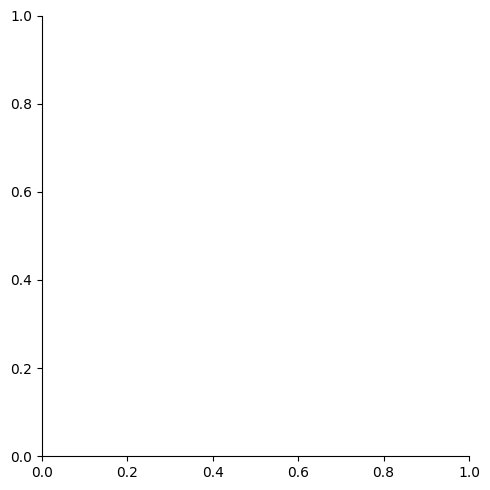

In [30]:
sns.distplot(real_saturation, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
sns.distplot(fake_saturation, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')

plt.legend(prop={'size': 16}, title = 'Image Type')
plt.title('Density Plot of Image Saturation')
plt.xlabel('Saturation')
plt.ylabel('Density')

plt.show()

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_13844\2854691290.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_unique_pixels, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_13844\2854691290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

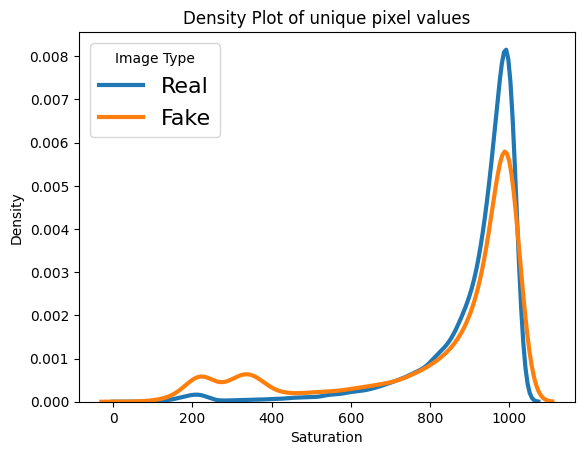

In [ ]:
sns.distplot(real_unique_pixels, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
sns.distplot(fake_unique_pixels, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')

plt.legend(prop={'size': 16}, title = 'Image Type')
plt.title('Density Plot of unique pixel values')
plt.xlabel('Saturation')
plt.ylabel('Density')

plt.show()

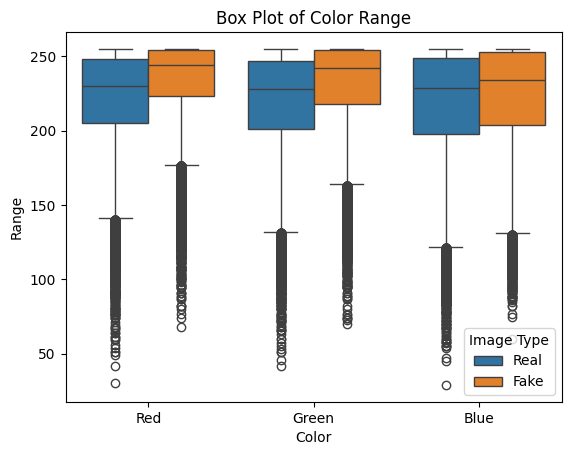

In [31]:
import pandas as pd

# Prepare data for boxplot
data = []
for ranges, label in zip([real_color_range, fake_color_range], ['Real', 'Fake']):
    for color, color_name in zip(zip(*ranges), ['Red', 'Green', 'Blue']):
        for value in color:
            data.append([label, color_name, value])

df = pd.DataFrame(data, columns=['Image Type', 'Color', 'Range'])

# Create boxplot
sns.boxplot(x='Color', y='Range', hue='Image Type', data=df)

plt.title('Box Plot of Color Range')
plt.show()